<a href="https://colab.research.google.com/github/arbi11/YCBS-272/blob/master/Lec_5_Lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NHANES case study

Here we will demonstrate how to use Python and [Pandas](https://pandas.pydata.org/) to perform some basic analyses the [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm) study to illustrate the techniques.

*This link might be useful. Use only when you are stuck.*
[CHEAT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2) 



The following import statements make the libraries that we will need available.  

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Next we will load the NHANES data from a file.

In [2]:
! git clone https://github.com/arbi11/YCBS-272.git

Cloning into 'YCBS-272'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 62 (delta 27), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (62/62), done.


In [3]:
! ls

sample_data  YCBS-272


In [4]:
cd YCBS-272/

/content/YCBS-272


In [5]:
! ls

drinks.csv		       Lec_4_2.ipynb  nhanes_2015_2016.csv
fandango_score_comparison.csv  Lec_4_3.ipynb  README.md
Lec_2.ipynb		       Lec_4_4.ipynb  YCBS_272_Assignment_1.ipynb
Lec_2_solution.ipynb	       Lec_4_5.ipynb
Lec_4_1.ipynb		       Lec_4_6.ipynb


## 1.1 Load Dataset

In [0]:
# Read the data -- into a pandas dataframe 
df = pd.read_csv("nhanes_2015_2016.csv")

In [7]:
df.describe()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
count,5735.000000,5208.000000,1731.000000,3379.000000,5735.000000,5735.000000,5735.000000,5735.000000,5734.000000,5474.000000,5474.000000,5735.000000,5735.000000,5735.000000,5735.000000,5134.000000,5401.000000,5401.000000,5535.000000,5535.000000,5666.000000,5673.000000,5662.000000,5345.000000,5427.000000,5427.000000,5368.000000,4732.000000
mean,88678.583435,1.336406,1.587522,3.911512,1.607149,1.518919,48.052310,3.042371,1.185385,3.441725,2.628608,3.323801,40312.412352,1.487881,126.236617,2.403204,125.084614,69.516386,124.783017,69.346703,81.342676,166.142834,29.382197,38.576782,37.146987,33.112235,99.567213,1.915469
std,2882.139237,0.505514,0.623940,34.341839,0.571975,0.499686,18.431011,1.296793,0.491678,1.309700,2.366786,1.724670,38768.921774,0.499897,4.244406,1.601995,18.480873,12.881575,18.527012,13.022829,21.764409,10.079264,7.095921,3.873018,2.800784,5.268027,16.844109,0.414845
min,83732.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5330.960000,1.000000,119.000000,0.000000,82.000000,0.000000,84.000000,0.000000,32.400000,129.700000,14.500000,26.000000,28.200000,17.100000,58.700000,1.000000
25%,86164.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,2.000000,1.000000,3.000000,1.000000,2.000000,17164.085000,1.000000,123.000000,1.060000,112.000000,62.000000,112.000000,62.000000,65.900000,158.700000,24.300000,36.000000,35.200000,29.500000,87.600000,2.000000
50%,88668.000000,1.000000,2.000000,2.000000,2.000000,2.000000,48.000000,3.000000,1.000000,4.000000,1.000000,3.000000,24654.860000,1.000000,126.000000,1.980000,122.000000,70.000000,122.000000,70.000000,78.200000,166.000000,28.300000,38.600000,37.100000,32.700000,98.300000,2.000000
75%,91178.500000,2.000000,2.000000,3.000000,2.000000,2.000000,63.000000,4.000000,1.000000,4.750000,5.000000,5.000000,42862.305000,2.000000,130.000000,3.740000,134.000000,78.000000,134.000000,78.000000,92.700000,173.500000,33.000000,41.200000,39.000000,36.200000,109.300000,2.000000
max,93702.000000,9.000000,9.000000,999.000000,9.000000,2.000000,80.000000,5.000000,9.000000,9.000000,77.000000,7.000000,233755.840000,2.000000,133.000000,5.000000,236.000000,120.000000,238.000000,144.000000,198.900000,202.700000,67.300000,51.500000,47.400000,58.400000,171.600000,9.000000


Columns of the data

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

Data type of each column

SEQN          int64
ALQ101      float64
ALQ110      float64
ALQ130      float64
SMQ020        int64
RIAGENDR      int64
RIDAGEYR      int64
RIDRETH1      int64
DMDCITZN    float64
DMDEDUC2    float64
DMDMARTL    float64
DMDHHSIZ      int64
WTINT2YR    float64
SDMVPSU       int64
SDMVSTRA      int64
INDFMPIR    float64
BPXSY1      float64
BPXDI1      float64
BPXSY2      float64
BPXDI2      float64
BMXWT       float64
BMXHT       float64
BMXBMI      float64
BMXLEG      float64
BMXARML     float64
BMXARMC     float64
BMXWAIST    float64
HIQ210      float64
dtype: object

Can you find what is BMXWT

## 1.1 Frequency tables

The [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  

In statistical terms, this is the "frequency distribution" of the variable.  

Below we show the frequency distribution of the [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2) variable, which is a variable that reflects a person's level of educational attainment.  

The `value_counts` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  

This table shows, for example, that 1621 people in the data file have DMDEDUC=4, which indicates that the person has completed some college, but has not graduated with a four-year degree.

In [0]:
df.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

## 1.2 Missing values

Note that the `value_counts` method excludes missing values.  We confirm this below by adding up the number of observations with a DMDEDUC2 value equal to 1, 2, 3, 4, 5, or 9 (there are 5474 such rows), and comparing this to the total number of rows in the data set, which is 5735. 

This tells us that there are 5735 - 5474 = 261 missing values for this variable (other variables may have different numbers of missing values).

In [0]:
print(df.DMDEDUC2.value_counts().sum())
print(1621 + 1366 + 1186 + 655 + 643 + 3) # Manually sum the frequencies
print(df.shape)

5474
5474
(5735, 28)


Another way to obtain this result is to locate all the null (missing) values in the data set using the [isnull](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html) Pandas function, and count the number of such locations.

In [0]:
pd.isnull(df.DMDEDUC2).sum()

261

## 1.3 Re-labeling
In some cases it is useful to [replace](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.replace.html) integer codes with a text label that reflects the code's meaning.  Below we create a new variable called 'DMDEDUC2x' that is recoded with text labels, then we generate its frequency distribution.

In [0]:
df["DMDEDUC2x"] = df.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
df.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

We will also want to have a relabeled version of the gender variable, so we will construct that now as well.  We will follow a convention here of appending an 'x' to the end of a categorical variable's name when it has been recoded from numeric to string (text) values.

In [0]:
df["RIAGENDRx"] = df.RIAGENDR.replace({1: "Male", 2: "Female"})

For many purposes it is more relevant to consider the proportion of the sample with each of the possible category values, rather than the number of people in each category.  We can do this as follows:

In [0]:
x = df.DMDEDUC2x.value_counts()  # x is just a name to hold this value temporarily
x / x.sum()

Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: DMDEDUC2x, dtype: float64

## 1.4 Creating a category

In some cases we will want to treat the missing response category as another category of observed response, rather than ignoring it when creating summaries.  Below we create a new category called "Missing", and assign all missing values to it usig [fillna](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#filling-missing-values-fillna).  Then we recalculate the frequency distribution.  We see that 4.6% of the responses are missing.

In [0]:
df["DMDEDUC2x"] = df.DMDEDUC2x.fillna("Missing")
x = df.DMDEDUC2x.value_counts()
x / x.sum()

Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
Missing            0.045510
Don't know         0.000523
Name: DMDEDUC2x, dtype: float64

## 1.5 Numerical summaries

A quick way to get a set of numerical summaries for a quantitative variable is with the [describe](https://pandas.pydata.org/pandas-docs/stable/basics.html#summarizing-data-describe) data frame method.  

Below we demonstrate how to do this using the body weight variable ([BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT)).  

As with many surveys, some data values are missing, so we explicitly drop the missing cases using the [dropna](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#dropping-axis-labels-with-missing-data-dropna) method before generating the summaries.

In [0]:
df.BMXWT.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

It's also possible to calculate individual summary statistics from one column of a data set.  This can be done using Pandas methods, or with numpy functions:

In [0]:
x = df.BMXWT.dropna()  # Extract all non-missing values of BMXWT into a variable called 'x'
print(x.mean()) # Pandas method
print(np.mean(x)) # Numpy function

print(x.median())
print(np.percentile(x, 50))  # 50th percentile, same as the median
print(np.percentile(x, 75))  # 75th percentile
print(x.quantile(0.75)) # Pandas method for quantiles, equivalent to 75th percentile

81.34267560889509
81.34267560889509
78.2
78.2
92.7
92.7


### 1.5.1
Next we look at frequencies for a systolic blood pressure measurement ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1)).  

"BPX" here is the NHANES prefix for blood pressure measurements, "SY" stands for "systolic" blood pressure (blood pressure at the peak of a heartbeat cycle), and "1" indicates that this is the first of three systolic blood presure measurements taken on a subject.

A person is generally considered to have **pre-hypertension** when their systolic blood pressure is between 120 and 139, or their diastolic blood pressure is between 80 and 89. 

Considering only the systolic condition, we can calculate the proprotion of the NHANES sample who would be considered to have pre-hypertension. 

In [0]:
np.mean((df.BPXSY1 >= 120) & (df.BPXSY2 <= 139))  # "&" means "and"

0.3741935483870968

Next we calculate the propotion of NHANES subjects who are pre-hypertensive based on diastolic blood pressure.

In [0]:
np.mean((df.BPXDI1 >= 80) & (df.BPXDI2 <= 89))

0.14803836094158676

Finally we calculate the proportion of NHANES subjects who are pre-hypertensive based on either systolic or diastolic blood pressure.  Since some people are pre-hypertensive under both criteria, the proportion below is less than the sum of the two proportions calculated above.

Since the combined systolic and diastolic condition for pre-hypertension is somewhat complex, below we construct temporary variables 'a' and 'b' that hold the systolic and diastolic pre-hypertensive status separately, then combine them with a "logical or" to obtain the final status for each subject.

In [0]:
a = (df.BPXSY1 >= 120) & (df.BPXSY2 <= 139)
b = (df.BPXDI1 >= 80) & (df.BPXDI2 <= 89)
print(np.mean(a | b))  # "|" means "or"

0.43975588491717527


Blood pressure measurements are affected by a phenomenon called "white coat anxiety", in which a subject's bood pressure may be slightly elevated if they are nervous when interacting with health care providers.  Typically this effect subsides if the blood pressure is measured several times in sequence.  In NHANES, both systolic and diastolic blood pressure are meausred three times for each subject (e.g. [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2) is the second measurement of systolic blood pressure).  We can calculate the extent to which white coat anxiety is present in the NHANES data by looking a the mean difference between the first two systolic or diastolic blood pressure measurements.

In [0]:
print(np.mean(df.BPXSY1 - df.BPXSY2))
print(np.mean(df.BPXDI1 - df.BPXDI2))

0.6749860309182343
0.3490407897187558


## 1.6 Graphical summaries

Quantitative variables can be effectively summarized graphically.  Below we see the distribution of body weight (in Kg), shown as a histogram. 

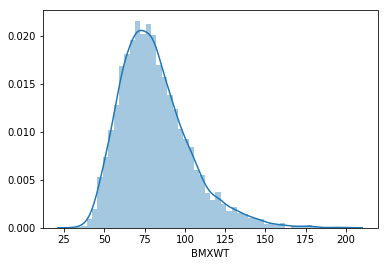

In [0]:
sns.distplot(da.BMXWT.dropna())

Next we look at the histogram of systolic blood pressure measurements.  You can see that there is a tendency for the measurements to be rounded to the nearest 5 or 10 units.

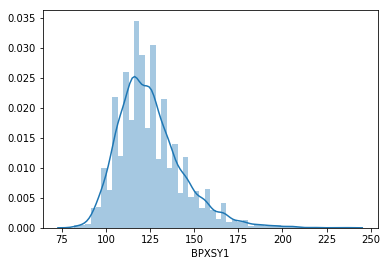

In [0]:
sns.distplot(da.BPXSY1.dropna())

To compare several distributions, we can use side-by-side boxplots.  Below we compare the distributions of the first and second systolic blood pressure measurements (BPXSY1, BPXSY2), and the first and second diastolic blood pressure measurements ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1), BPXDI2). As expected, diastolic measurements are substantially lower than systolic measurements.  Above we saw that the second blood pressure reading on a subject tended on average to be slightly lower than the first measurement.  This difference was less than 1 mm/Hg, so is not visible in the "marginal" distributions shown below.

In [1]:
bp = sns.boxplot(da.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

NameError: ignored

## 1.7 Stratification

One of the most effective ways to get more information out of a dataset is to divide it into smaller, more uniform subsets, and analyze each of these "strata" on its own.  We can then formally or informally compare the findings in the different strata.  When working with human subjects, it is very common to stratify on demographic factors such as age, sex, and race.

To illustrate this technique, consider blood pressure, which is a value that tends to increase with age.  To see this trend in the NHANES data, we can [partition](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) the data into age strata, and construct side-by-side boxplots of the systolic blood pressure (SBP) distribution within each stratum.  Since age is a quantitative variable, we need to create a series of "bins" of similar SBP values in order to stratify the data.  Each box in the figure below is a summary of univariate data within a specific population stratum (here defined by age).

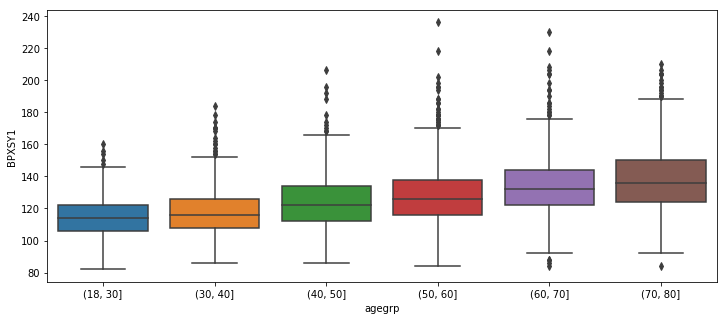

In [0]:
df["agegrp"] = pd.cut(df.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
sns.boxplot(x="agegrp", y="BPXSY1", data=df)  # Make boxplot of BPXSY1 stratified by age group

Taking this a step further, it is also the case that blood pressure tends to differ between women and men.  While we could simply make two side-by-side boxplots to illustrate this contrast, it would be a bit odd to ignore age after already having established that it is strongly associated with blood pressure.  Therefore, we will doubly stratify the data by gender and age.

We see from the figure below that within each gender, older people tend to have higher blood pressure than younger people.  However within an age band, the relationship between gender and systolic blood pressure is somewhat complex -- in younger people, men have substantially higher blood pressures than women of the same age.  However for people older than 50, this relationship becomes much weaker, and among people older than 70 it appears to reverse. It is also notable that the variation of these distributions, reflected in the height of each box in the boxplot, increases with age.

When stratifying on two factors (here age and gender), we can group the boxes first by age, and within age bands by gender, as above, or we can do the opposite -- group first by gender, and then within gender group by age bands.  Each approach highlights a different aspect of the data.